<a href="https://colab.research.google.com/github/amina04/CNN-lstm/blob/main/SVM_nsl_kdd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **chargement des fichiers qui sont sur drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


la bibliothéque pandas nous donne le droit de travailler avec la format csv.
On utilise panda pour ouvrir la dataset

In [ ]:
import tensorflow as tf
import pandas as pd

**Donner les noms des column au dataset et spécifier la liste des  string contenu **

In [ ]:

featureV=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flagV=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_typeV=['tcp','udp','icmp']

serviceV=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}    

## **1.Load the data**

In [ ]:
data_train=pd.read_csv('/content/drive/MyDrive/data/nsl-kdd/KDDTrain+.txt',names=featureV)
data_test=pd.read_csv('/content/drive/MyDrive/data/nsl-kdd/KDDTest-21.txt',names=featureV)
data_valid=pd.read_csv('/content/drive/MyDrive/data/nsl-kdd/KDDTest+.txt',names=featureV)


In [ ]:
data_test.shape

(11850, 43)

In [ ]:
data_train.shape

(125973, 43)

In [ ]:
# data_train=pd.concat([data_train,data_train_2]).drop_duplicates(keep=False)
# data_train.reset_index(drop=True, inplace = True)
# data_train.shape
# data_train=pd.concat([data_train,data_test]).drop_duplicates(keep=False)
# data_train.reset_index(drop=True, inplace = True)
# data_train.shape

In [ ]:
print(f"numbers of protocol_type: {len(data_train['protocol_type'].value_counts())}")
print(f"number of 'service' in train datasets: {len(data_train.service.value_counts())}")
print(f"number of 'flag' in train datasets: {len(data_train['flag'].value_counts())}")

numbers of protocol_type: 3
number of 'service' in train datasets: 70
number of 'flag' in train datasets: 11


# **cleaning the data**

In [ ]:
# Checking if there are any NULL values in the dataset.

data_train.isnull().values.any()

False

In [ ]:
data_train.label.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [ ]:
data_train.shape

(125973, 43)

In [ ]:
df_train_obj = data_train.iloc[:, :-2].select_dtypes(include='object')
df_train_num = data_train.iloc[:, :-2].select_dtypes(exclude='object')

# df_train_2_obj = data_train_2.iloc[:, :-2].select_dtypes(include='object')
# df_train_2_num = data_train_2.iloc[:, :-2].select_dtypes(exclude='object')

print(f"shape of numeric features: {df_train_num.shape}")
print(f"shape of object features: {df_train_obj.shape}")

shape of numeric features: (125973, 38)
shape of object features: (125973, 3)


In [ ]:
df_test_obj = data_test.iloc[:, :-2].select_dtypes(include='object')
df_test_num = data_test.iloc[:, :-2].select_dtypes(exclude='object')

print(f"shape of numeric features: {df_test_num.shape}")
print(f"shape of object features: {df_test_obj.shape}")

shape of numeric features: (11850, 38)
shape of object features: (11850, 3)


In [ ]:
df_train_obj.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


encoder les labels 0 pour normal et 1 attack

In [ ]:
data_train['label']=data_train['label'].replace(['normal.','normal'],0)
for i in range(len(binary_attack)):
  data_train['label'] = data_train['label'].replace(binary_attack[i], 1)
y_train=data_train['label']

# data_train_2['label']=data_train_2['label'].replace(['normal.','normal'],0)
# for i in range(len(binary_attack)):
#   data_train_2['label'] = data_train_2['label'].replace(binary_attack[i], 1)
# y_train_2=data_train_2['label']


data_test['label']=data_test['label'].replace(['normal.','normal'],0)
for i in range(len(binary_attack)):
  data_test['label'] = data_test['label'].replace(binary_attack[i], 1)
y_test=data_test['label']
#supprimer la colonne la bel de dataset car on a créer une copier déja ===>séparation
del data_train['label']
del data_test['label']
# del data_train_2['label']

In [ ]:
data_train.shape

(125973, 42)

In [ ]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


## **2.Working with Validation data -Numericalization-**

In [ ]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

#encoder juste les les column qui contient string
data_train_enc = enc.fit_transform(df_train_obj).toarray()
train_enc_features = enc.get_feature_names_out(input_features=df_train_obj.columns)
data_test_enc = enc.transform(df_test_obj).toarray()
test_enc_features = enc.get_feature_names_out(input_features=df_test_obj.columns)

# data_train_2_enc = enc.fit_transform(df_train_2_obj).toarray()
# train_2_enc_features = enc.get_feature_names_out(input_features=df_train_2_obj.columns)
#concatiner string avec num columns
X_train_enc = np.c_[df_train_num, data_train_enc]
X_test_enc = np.c_[df_test_num, data_test_enc]
# X_train_2_enc = np.c_[df_train_2_num, data_train_2_enc]
print(f"X_train_enc shape: {X_train_enc.shape}")
print(f"X_test_enc shape: {X_test_enc.shape}")
# print(f"X_train_enc shape: {X_train_2_enc.shape}")
######################################
#encoder les labels
# y_train=pd.get_dummies(y_train)
# y_valid=pd.get_dummies(y_valid)
# y_train_2=pd.get_dummies(y_train_2)
y_train.head()

X_train_enc shape: (125973, 122)
X_test_enc shape: (11850, 122)


0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [ ]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train_enc)
X_test_scaler = scaler.fit_transform(X_test_enc)
# X_train_2_scaler = scaler.fit_transform(X_train_2_enc)
########################
# y_train=scaler.fit_transform(y_train)
# y_valid=scaler.fit_transform(y_valid)
# y_train_2=scaler.fit_transform(y_train_2)
y_train[0]

0

In [ ]:
x_train = np.reshape(X_train_scaler, (X_train_scaler.shape[0], X_train_scaler.shape[1]))
# x_train_2 = np.reshape(X_train_2_scaler, (X_train_2_scaler.shape[0], X_train_2_scaler.shape[1], 1))
#x_train[0]

In [ ]:
# from sklearn.model_selection import train_test_split
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().

# x_train, x_test ,y_train, y_test = train_test_split(x_train, y_train, test_size=.2)
# x_train.shape, x_test.shape ,y_train.shape, y_test.shape
x_test = np.reshape(X_test_scaler, (X_test_scaler.shape[0], X_test_scaler.shape[1]))

In [ ]:
y_test.shape

(11850,)

## **3.Define the model**

In [ ]:
#imports
import numpy as np
from scipy.io import loadmat
from sklearn import svm


**Spatial 1D version of Dropout.**

This version performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements. If adjacent frames within feature maps are strongly correlated (as is normally the case in early convolution layers) then regular dropout will not regularize the activations and will otherwise just result in an effective learning rate decrease. In this case, SpatialDropout1D will help promote independence between feature maps and should be used instead.

In [ ]:
svc = svm.SVC()
# par default of svc C=1.0, kernel='rbf', degree=3, gamma='scale' 3 for avoid UF or OF
svc.fit(x_train, y_train)

# Testing
print('Test accuracy = {0}%'.format(np.round(svc.score(x_test, y_test) * 100, 2)))


Test accuracy = 55.05%


## **4.Compile the model**


## **5.Fit the model**

**The loss function** is perhaps the most important
aspect of neural networks. The gradients are calculated
using the loss function, and the gradient is used to update
the neural network biases, increasing or decreasing the
neural network weights


In [ ]:

pred = svc.predict(x_test)


In [ ]:
#check accuaracy of prediction
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score
#model.score(x_valid,y_valid)

In [ ]:

print('Confusion Matrix')
cf_matrix=confusion_matrix(y_test,pred)
print(cf_matrix)

Confusion Matrix
[[1456  696]
 [4630 5068]]


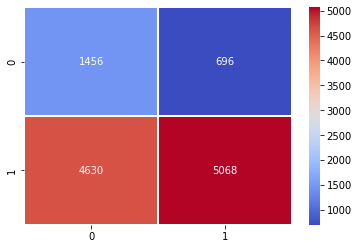

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cf_matrix, cmap='coolwarm',annot=True, linewidth=1,fmt="d")
plt.show()

In [ ]:
accuracy =accuracy_score(y_test, pred)*100
print(accuracy)

55.05485232067511


In [ ]:
recall = recall_score(y_test, pred , average="binary")
precision = precision_score(y_test, pred, average="binary")
FPR = cf_matrix[0][1]/(cf_matrix[0][1]+cf_matrix[1][1]) 


In [ ]:
print("Precision : " , precision*100)
print("Recall : ", recall*100)
print("Accuracy : ",accuracy)
print("FPR : ",FPR*100)

Precision :  87.92505204718945
Recall :  52.25819756650856
Accuracy :  55.05485232067511
FPR :  12.074947952810549
